# Topic 02: Review of Linear Algebra
$_{\text{©D.J. Lopez | 2021 | Fudamentals of Machine Learning}}$

Linear algebra is undoubtfully one of the foundations of Machine Learning. Through linear algebra, we can perform more optimized techniques in computing an array of numbers wherein mostly used in Machine Learning. In this chapter, we are going to review the concepts, theories, and operations in Linear Algebra that are useful in Machine Learning. For this notebook we will be covering the following topics:
* Vector and Matrix Representation
* Linear Transformation and Matrix Operations
* Vectorization


# Vector and Matrix Representation

Vectors and Matrices are the fundamental objects in Linear Algebra programming. We'll be defining each of these objects specifically in the Computer Science/Engineering perspective since it would be much confusing if we consider their Physics and Pure Mathematics definitions.

## Vectors
Vectors are array of numerical values or scalars that would represent any feature space. Feature spaces or simply dimensions or the parameters of an equation or a function.

Starting this module we will be using NumPy. NumPy or Numerical Python, is mainly used for matrix and vector operations. It is capable of declaring computing and representing matrices. Most Python scienitifc programming libraries uses NumPy as the basic code.


Now that you know how to represent vectors using their component and matrix form we can now hard-code them in Python. Let's say that you have the vectors:

$$ A = 4\hat{x} + 3\hat{y} \\
B = 2\hat{x} - 5\hat{y}$$

In which it's matrix equivalent is:
$$ A = \begin{bmatrix} 4 \\ 3\end{bmatrix} , B = \begin{bmatrix} 2 \\ -5\end{bmatrix}\\
 A = \begin{bmatrix} 4 & 3\end{bmatrix} \\
 B = \begin{bmatrix} 2 & -5\end{bmatrix} 
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([4,3])
B = np.array([2, -5])

print('Vector A is ', A)
print('Vector B is ', B)

Vector A is  [4 3]
Vector B is  [ 2 -5]


### Linear Combinations

It is said that a linear combination is the combination of linear scaling and addition of a vector its bases/components.
We will try to visualize the vectors and their linear combinations by plotting a sample of real number values for the scalars for the vectors. Let's first try the vectors below:
$$X = \begin{bmatrix} 2\\5 \\\end{bmatrix} , Y = \begin{bmatrix} 7\\9 \\\end{bmatrix} $$

In [2]:
vectX =  np.array([2,5])
vectY =  np.array([7,9])

Linear combinations usually have a form that takes on.
$$a_0x_0+a_1x_1+a_2x_2+...+a_nx_n$$
It can then be expressed as the inner product of two vectors.
$$\begin{bmatrix}a_0 \\ a_1\\a_2 \\\vdots \\ a_n\end{bmatrix} \cdot \begin{bmatrix}x_0 \\ x_1\\x_2 \\\vdots \\ x_n\end{bmatrix}$$

### Vector Spans and Spaces
As discussed in the lecture, the span of individual vectors can be represented by a line span. Let's take vector $X$ as an example.
$$X = c\cdot v $$
Where as $c$ is some scalar or range of scalars that represents the scaling factor of a vector and $v$ is any vector. In our example $v$ could be the earlier declared `vectX`.
$$X = c\cdot \begin{bmatrix} 2\\5 \\\end{bmatrix} $$

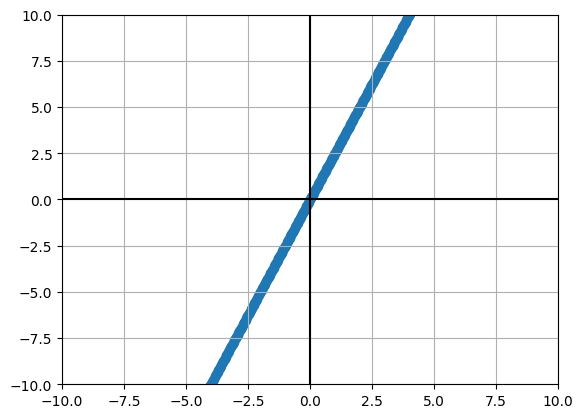

In [3]:
c = np.arange(-10,10,0.0125)

plt.scatter(c*vectX[0],c*vectX[1])

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.show()

So what if we are to plot the span of a linear combination of vectors? We can visualize as a plane on the 2-dimensional coordinate system. Let's take the span of the linear combination below:

$$S = \begin{Bmatrix} c_1 \cdot\begin{bmatrix} 1\\0 \\\end{bmatrix}, 
c_2 \cdot \begin{bmatrix} 1\\-1 \\\end{bmatrix}\end{Bmatrix} $$

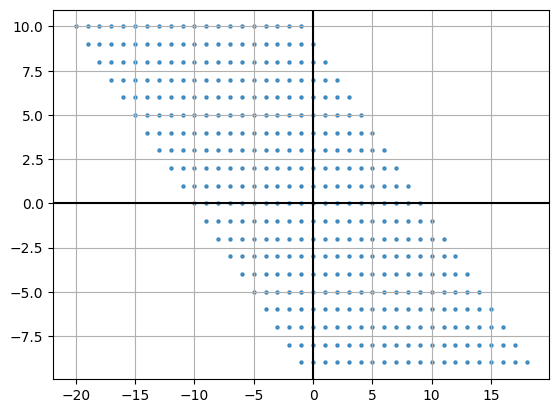

In [4]:
vectA = np.array([1,0])
vectB = np.array([1,-1])

R = np.arange(-10,10,1)

c1, c2 = np.meshgrid(R,R)
vectR = vectA + vectB
spanRx = c1*vectA[0] + c2*vectB[0]
spanRy = c1*vectA[1] + c2*vectB[1]
plt.scatter(spanRx,spanRy, s=5, alpha=0.75)

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.show()

Take note that if vectors are seen to be as a 2-dimensional span we can say it has a Rank of 2 or $\mathbb{R}^2$. But if the span of the linear combination of vectors are seen to be like a line, they are said to be <b> linearly dependent </b> and they have a rank of 1 or $\mathbb{R}^1$.

### Inner Product 
The inner product of a vector results into a scalar value. The purpose of this operation is to know the similarity of two different vectors through directional multiplication. The inner product of two vectors can be represented by the equation:
$$\sum^N_{i=0}u_i\times v_i$$
Whereas $u$ and $v$ are vectors wherein they both have $N$ number of elements. This can be further simplified using the inner product vector form:
$$u\cdot v$$
Again still following the rule that $u$ has the same size as $v$.


In [5]:
u = np.array([1,2,3])
v = np.array([4,2,-3])

u_dot_v = u @ v
u_dot_v

-1

## Matrices

The notation and use of matrices is probably one of the fundamentals of modern computing. Matrices are also handy representations of complex equations or multiple inter-related equations from 2-dimensional equations to even hundreds and thousands of them.

Let's say for example you have $A$ and $B$ as system of equation.

$$
A = \left\{
    \begin{array}\\
        x + y \\ 
        4x - 10y
    \end{array}
\right. \\
B = \left\{
    \begin{array}\\
        x+y+z \\ 
        3x -2y -z \\
        -x + 4y +2z
    \end{array}
\right. 
$$

We could see that $A$ is a system of 2 equations with 2 parameters. While $B$ is a system of 3 equations with 3 parameters. We can represent them as matrices as:

$$
A=\begin{bmatrix} 1 & 1 \\ 4 & {-10}\end{bmatrix} \\
B=\begin{bmatrix} 1 & 1 & 1 \\ 3 & -2 & -1 \\ -1 & 4 & 2\end{bmatrix}
$$

The entities or numbers in matrices are called the elements of a matrix. These elements are arranged and ordered in rows and columns which form the list/array-like structure of matrices. And just like arrays, these elements are indexed according to their position with respect to their rows and columns. This can be reprsented just like the equation below. Whereas $A$ is a matrix consisting of elements denoted by $a_{i,j}$. Denoted by $i$ is the number of rows in the matrix while $j$ stands for the number of columns.<br>
Do note that the $size$ of a matrix is $i\times j$.

$$A=\begin{bmatrix}
a_{(0,0)}&a_{(0,1)}&\dots&a_{(0,j-1)}\\
a_{(1,0)}&a_{(1,1)}&\dots&a_{(1,j-1)}\\
\vdots&\vdots&\ddots&\vdots&\\
a_{(i-1,0)}&a_{(i-1,1)}&\dots&a_{(i-1,j-1)}
\end{bmatrix}
$$

### Types of Matrices

There are several ways of classifying matrices. Once could be according to their **shape** and another is according to their **element values**. We'll try to go through them.

#### According to Shape

In [6]:
def describe_mat(matrix):
    print(f'Matrix:\n{matrix}\n\nShape:\t{matrix.shape}\nRank:\t{matrix.ndim}\n')

##### Row Matrix

In [7]:
### According to Shape
## Declaring a Row Matrix
row_mat_1D = np.array([1, 3, 2]) ## this is a 1-D Matrix with a shape of (3,), it's not really considered as a row matrix.
row_mat_2D = np.array([
    [1,2,3]
    ]) ## this is a 2-D Matrix with a shape of (1,3)
describe_mat(row_mat_1D)
describe_mat(row_mat_2D)

Matrix:
[1 3 2]

Shape:	(3,)
Rank:	1

Matrix:
[[1 2 3]]

Shape:	(1, 3)
Rank:	2



##### Column Matrix

In [8]:
## Declaring a Column Matrix
col_mat = np.array([
    [1],
    [2],
    [5]
]) ## this is a 2-D Matrix with a shape of (3,1)
describe_mat(col_mat)

Matrix:
[[1]
 [2]
 [5]]

Shape:	(3, 1)
Rank:	2



##### Square Matrix

In [9]:
## Declaring a Square Matrix
def describe_mat(matrix):
    is_square = True if matrix.shape[0] == matrix.shape[1] else False 
    print(f'Matrix:\n{matrix}\n\nShape:\t{matrix.shape}\nIs Square: {is_square}\n')

square_mat = np.array([
    [1,2,5],
    [3,3,8],
    [6,1,2]
])

non_square_mat = np.array([
    [1,2,5],
    [3,3,8]
])

describe_mat(square_mat)
describe_mat(non_square_mat)

Matrix:
[[1 2 5]
 [3 3 8]
 [6 1 2]]

Shape:	(3, 3)
Is Square: True

Matrix:
[[1 2 5]
 [3 3 8]]

Shape:	(2, 3)
Is Square: False



#### According to Element Values

In [10]:
### According to Values
##Declaring a Null Matrix
def describe_mat(matrix):
    if matrix.size > 0:
        is_square = True if matrix.shape[0] == matrix.shape[1] else False 
        print(f'Matrix:\n{matrix}\n\nShape:\t{matrix.shape}\nIs Square: {is_square}\n')
    else:
        print('Matrix is Null')


#### Null Matrix

In [11]:
null_mat = np.array([])
describe_mat(null_mat)

Matrix is Null


##### Zero Matrix

In [12]:
zero_mat_row = np.zeros((1,2))
zero_mat_sqr = np.zeros((2,2))
zero_mat_rct = np.zeros((3,2))

print(f'Zero Row Matrix: \n{zero_mat_row}')
print(f'Zero Square Matrix: \n{zero_mat_sqr}')
print(f'Zero Rectangular Matrix: \n{zero_mat_rct}')

Zero Row Matrix: 
[[0. 0.]]
Zero Square Matrix: 
[[0. 0.]
 [0. 0.]]
Zero Rectangular Matrix: 
[[0. 0.]
 [0. 0.]
 [0. 0.]]


##### Ones Matrix

In [13]:
ones_mat_row = np.ones((1,2))
ones_mat_sqr = np.ones((2,2))
ones_mat_rct = np.ones((3,2))

print(f'Ones Row Matrix: \n{ones_mat_row}')
print(f'Ones Square Matrix: \n{ones_mat_sqr}')
print(f'Ones Rectangular Matrix: \n{ones_mat_rct}')

Ones Row Matrix: 
[[1. 1.]]
Ones Square Matrix: 
[[1. 1.]
 [1. 1.]]
Ones Rectangular Matrix: 
[[1. 1.]
 [1. 1.]
 [1. 1.]]


##### Diagonal Matrix

In [14]:
np.array([
    [2,0,0],
    [0,3,0],
    [0,0,5]
])
# a[1,1], a[2,2], a[3,3], ... a[n-1,n-1]


array([[2, 0, 0],
       [0, 3, 0],
       [0, 0, 5]])

In [15]:
d = np.diag([2,3,5,7])
np.diag(d).shape == d.shape[0] == d.shape[1]

False

In [16]:
d_true = np.array([
    [2,0,0],
    [0,3,0],
    [0,0,5]
])

i, j = np.nonzero(d_true) 
# print(i)
# print(j)
np.all(i == j)


True

In [17]:
d_false = np.array([
    [2,0,0],
    [0,3,0],
    [1,0,5]
])
i, j = np.nonzero(d_false) 
np.all(i == j)

False

##### Identity Matrix

In [18]:
np.eye(5)
# np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

##### Upper Triangular Matrix

In [19]:
np.array([
    [1,2,3],
    [0,3,1],
    [0,0,5]
])


array([[1, 2, 3],
       [0, 3, 1],
       [0, 0, 5]])

##### Lower Triangular Matrix

In [20]:
np.array([
    [1,0,0],
    [5,3,0],
    [7,8,5]
])

array([[1, 0, 0],
       [5, 3, 0],
       [7, 8, 5]])

# Matrix Operations

### Arithmetic in Matrices

In [21]:
A = np.array([
    [1,2],
    [2,3],
    [4,1]
])
B = np.array([
    [2,2],
    [0,0],
    [1,1]
])

#### Addition

In [22]:
A+B

array([[3, 4],
       [2, 3],
       [5, 2]])

#### Subtraction

In [23]:
A-B

array([[-1,  0],
       [ 2,  3],
       [ 3,  0]])

#### Element-Wise Multiplication

In [24]:
A*B

array([[2, 4],
       [0, 0],
       [4, 1]])

#### Division

In [25]:
np.divide(A,B)

C:\Users\Moyk\AppData\Local\Temp\ipykernel_3680\3449860715.py:1: RuntimeWarning: divide by zero encountered in divide
  np.divide(A,B)


array([[0.5, 1. ],
       [inf, inf],
       [4. , 1. ]])

### Dot Product
If you recall the dot product from laboratory activity before, we will try to implement the same operation with matrices. In matrix dot product we are going to get the sum of products of the vectors by row-column pairs. So if we have two matrices $X$ and $Y$:

$$X = \begin{bmatrix}x_{(0,0)}&x_{(0,1)}\\ x_{(1,0)}&x_{(1,1)}\end{bmatrix}, Y = \begin{bmatrix}y_{(0,0)}&y_{(0,1)}\\ y_{(1,0)}&y_{(1,1)}\end{bmatrix}$$

The dot product will then be computed as:
$$X \cdot Y= \begin{bmatrix} x_{(0,0)}*y_{(0,0)} + x_{(0,1)}*y_{(1,0)} & x_{(0,0)}*y_{(0,1)} + x_{(0,1)}*y_{(1,1)} \\  x_{(1,0)}*y_{(0,0)} + x_{(1,1)}*y_{(1,0)} & x_{(1,0)}*y_{(0,1)} + x_{(1,1)}*y_{(1,1)}
\end{bmatrix}$$

So if we assign values to $X$ and $Y$:
$$X = \begin{bmatrix}1&2\\ 0&1\end{bmatrix}, Y = \begin{bmatrix}-1&0\\ 2&2\end{bmatrix}$$
$$X \cdot Y= \begin{bmatrix} 1*-1 + 2*2 & 1*0 + 2*2 \\  0*-1 + 1*2 & 0*0 + 1*2 \end{bmatrix} = \begin{bmatrix} 3 & 4 \\2 & 2 \end{bmatrix}$$
This could be achieved programmatically using `np.dot()`, `np.matmul()` or the `@` operator.

In [26]:
X = np.array([
    [1,2],
    [0,1]
    ])
Y = np.array([
    [-1,0],
    [2,2]
])

X@Y

array([[3, 4],
       [2, 2]])

### Transposition
One of the fundamental operations in matrix algebra is Transposition. The transpose of a matrix is done by flipping the values of its elements over its diagonals. With this, the rows and columns from the original matrix will be switched. So for a matrix $A$ its transpose is denoted as $A^T$. 

In [27]:
A = np.array([
    [-1,0,3],
    [2,6,3],
    [9,7,4]
])

A.transpose()

array([[-1,  2,  9],
       [ 0,  6,  7],
       [ 3,  3,  4]])

### Inversion
The inverse of a matrix is another fundamental operation in matrix algebra. Determining the inverse of a matrix let us determine if its solvability and its characteristic as a system of linear equation — we'll expand on this in the nect module. Another use of the inverse matrix is solving the problem of divisibility between matrices. Although element-wise division exists but dividing the entire concept of matrices does not exists. Inverse matrices provides a related operation that could have the same concept of "dividing" matrices.

Now to determine the inverse of a matrix we need to perform several steps. So let's say we have a matrix $M$:
$$M = \begin{bmatrix}1&7\\-3&5\end{bmatrix}$$
First, we need to get the determinant of $M$.
$$|M| = (1)(5)-(-3)(7) = 26$$
Next, we need to reform the matrix into the inverse form:
$$M^{-1} = \frac{1}{|M|} \begin{bmatrix} m_{(1,1)} & -m_{(0,1)} \\ -m_{(1,0)} & m_{(0,0)}\end{bmatrix}$$
So that will be:
$$M^{-1} = \frac{1}{26} \begin{bmatrix} 5 & -7 \\ 3 & 1\end{bmatrix} = \begin{bmatrix} \frac{5}{26} & \frac{-7}{26} \\ \frac{3}{26} & \frac{1}{26}\end{bmatrix}$$
For higher-dimension matrices you might need to use co-factors, minors, adjugates, and other reduction techinques. To solve this programmatially we can use `np.linalg.inv()`.

### Determinants
Determinants are special values produced from matrix analysis. Detemrinants tell us the ratio of the values of the subspaces of the matrix. It further explains whether matrices are singular.

In [28]:
a = np.array([
    [1, 2], 
    [3, 4]]) 
np.linalg.det(a)

-2.0000000000000004

#Eigenvalues
<b>Eigen</b> does not denote famous actors but rather coming from a German etymology meining "characteristic". So we can say in analogy, that solving for the <b>eigen</b> of anything is finiding their characteristics.

Referring to our definition of eigen earlier, we can deduct that eigenvectors are characteristic vectors or representative vectors of a matrix. In the more technical sense, these are vectors that can be considered constant/unchanging even when a linear transformation. So whether if we do any geometric translation, that vector in the span of the matrix will not translate to a different vector but rather just scale —meaning it is linearly dependent from its original vector.

So for example we'll have a matrix $x$ wherein we apply a matrix transformation $F$ it gives us a resulting vector $A$.
$$F\cdot x = A$$
So in matrix $x$ there would exist a vector $v$ upond having a reultant matrix $A$ it will just be a scalar transform of itself (eigenvector). We can denote the scaling factor as $\lambda$. We can then define the eigenvector as:
$$A\cdot v = \lambda * v$$

In [29]:
def plot_quiv(x,y=None,eig=None):
    size= (5,5)
    plt.figure(figsize=(4,4))
          
    plt.xlim(-size[0],size[0])
    plt.ylim(-size[1],size[1])
    plt.xticks(np.arange((-size[0]), size[0]+1, 1.0))
    plt.yticks(np.arange((-size[1]), size[1]+1, 1.0))
    
    plt.quiver([0,0],[0,0], x[0,:], x[1,:], 
               angles='xy', scale_units='xy',scale=1, 
               color=['red','red'], label='Original Vector')## use column spaces
    if y is not None:
        plt.quiver([0,0],[0,0], y[0,:], y[1,:], 
               angles='xy', scale_units='xy',scale=1, 
               color=['blue','blue'], label='Transformed Vector')## use column spaces
    if eig is not None:
        c = np.arange(-10,10,0.25)
#         plt.plot(c*eig[0,0],c*eig[1,0], color='orange') 
        plt.plot(c*eig[0,1], c*eig[1,1], color='orange', label='Eigenspace') 
        plt.plot(c*eig[0,0],c*eig[1,0], color='orange') 
        
        plt.plot(c*eig[0,0], c*eig[0,1], color='orange', label='Eigenspace') 
        plt.plot(c*eig[1,0],c*eig[1,1], color='orange') 

        
    plt.grid()
    plt.legend()
    plt.show()

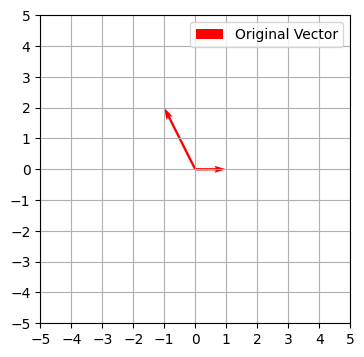

In [30]:
## Let's try to determine that manually
x = np.array([
    [1,-1],
    [0,2]
])
plot_quiv(x)

[[2. 1.]
 [0. 2.]]


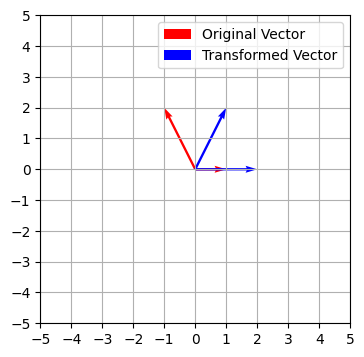

In [31]:
F = np.array([
    [2, 1.5],
    [0, 1]
])
A = F@x
print(A)
plot_quiv(x,A)

In the linear transformation above, we can see that the first vector (red) did not shift or rotate to any other coordinate in the 2D space. We can say that the first vector is an eigenvector since it remains on its span even if a linear transformation is applied. But do note there could be more than one eigenvector for a matrix, and most of the times these vectors cannot be identified through visual inspection. We can try to solve this using the formula we set above.
$$(A \cdot v) - (\lambda * v) = 0 $$
$$(A-\lambda)\cdot v = 0$$
Assuming that $v$ is non-zero, well try to solve for $A-\lambda$ in which it will equate to 0. Take note that $A$ is a vector and $\lambda$ is a scalar. 

In [32]:
def plot_tr_eig(inp, trans, eig, q1=False):
    c1 = np.arange(-5, 5, 0.5)
    c2 = np.arange(-5, 5, 0.5)
    if q1:
        c1 = np.arange(0, 5, 0.5)
        c2 = np.arange(0, 5, 0.5)    
    X,Y= np.meshgrid(c1, c2)
    v = np.array([X.flatten(),Y.flatten()])
    A = F@inp@v   

    fig, ax = plt.subplots()    
    size= (5,5)
    fig.set_size_inches(10,10)
          
    ax.set_xlim(-size[0],size[0])
    ax.set_ylim(-size[1],size[1])
    ax.set_xticks(np.arange((-size[0]), size[0]+1, 1.0))
    ax.set_yticks(np.arange((-size[1]), size[1]+1, 1.0))    
    if q1:
        ax.set_xlim(0,size[0])
        ax.set_ylim(0,size[1])
        ax.set_xticks(np.arange(0, size[0]+1, 1.0))
        ax.set_yticks(np.arange(0, size[1]+1, 1.0))
    q = ax.quiver(X, Y,
                  A[0,:].reshape(int(np.sqrt(A[0,:].size)), int(np.sqrt(A[0,:].size))), 
                  A[1,:].reshape(int(np.sqrt(A[1,:].size)), int(np.sqrt(A[1,:].size))),
                 color='royalblue')
    ax.quiverkey(q, X=0.3, Y=1.1, U=10,
                 label='Quiver key, length = 10', labelpos='E')    
    if eig is not None:
        c = np.arange(-20,20,0.25)
        plt.plot(c*eig[0,1],c*eig[0,0], color='orange') 
        plt.plot(c*eig[1,1], c*eig[1,0], color='orange', label='Eigenvector') 

    plt.show()

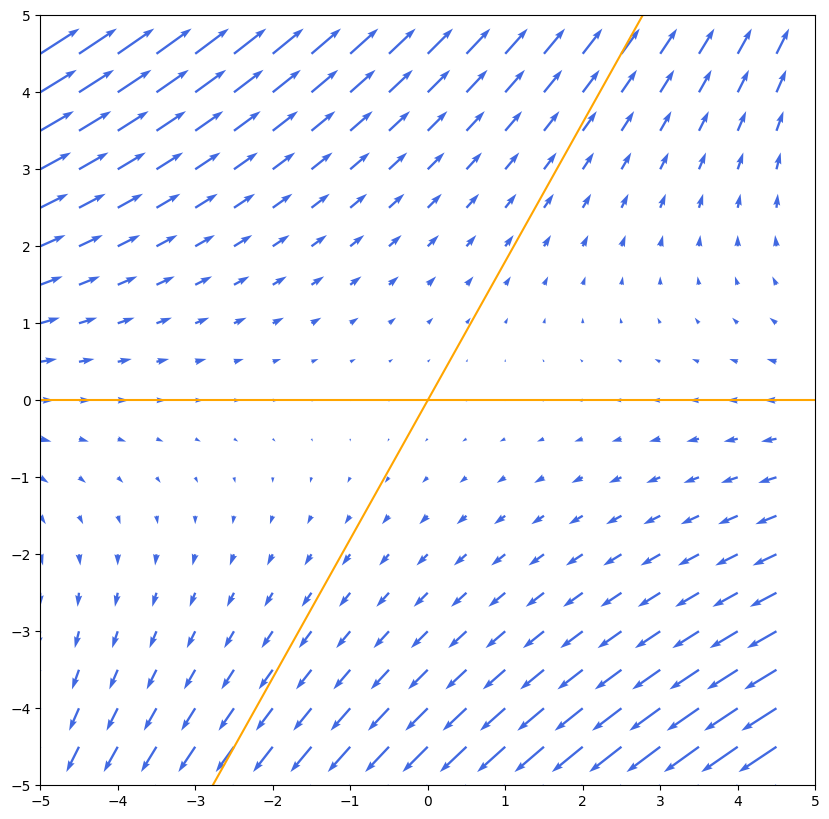

In [33]:
x = np.array([
    [1,0],
    [0,1]
])
F = np.array([
    [-1,2],
    [0,2]
])
eigval, eigvect = np.linalg.eig(F@x)
plot_tr_eig(x,F,eigvect)

## Special Matrix Properties
Further from the theories discussed in this notebook, we will look further in analyzing matrices with the special properties they hold.

### Singular Matrices/Vectors
Singular matrices or vectors are said to converge or collapse on a dimension existing on its vector space. This can be further explain by the **Rank** of a matrix.

In [34]:
from numpy.linalg import matrix_rank

In [35]:
### Rank 0 matrices
RankZero = np.zeros((4,))
matrix_rank(np.zeros((4,)))

0

In [36]:
### Rank 1 Matrices
RankOne = np.ones((4,))
matrix_rank(np.ones((4,)))

1

In [37]:
### Rank 2 Matrices
RankTwo = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,0],
    ])
matrix_rank(RankTwo)

2

In [44]:
### Rank N and N-1 Matrices
RankN = np.eye((4))
matrix_rank(RankN)

4

In [39]:
N = np.eye(4); N[-1,-1] = 0
matrix_rank(N)

3

### Symmetric Vectors
Symmetric vectors are defined as matrices that are equal to themselves even after transposition:
$$A = A^T$$

In [40]:
A = np.array([
    [ 1, 1,-1],
    [ 1, 2, 0],
    [-1, 0, 5]
])  

A.transpose()

array([[ 1,  1, -1],
       [ 1,  2,  0],
       [-1,  0,  5]])

### Invertible Matrices
Invertible matrices are square matrices wherein its inverse exists. A matrix is said to be invertible if it is not singular.

#### Conditions for Invertible Matrix
$$det(A) ≠ 0$$
$$and$$
$$AA^{-1} = I$$

In [46]:
InvMat = np.array([
    [4,2],
    [1,3],
    ])
    

if np.linalg.det(InvMat) != 0: # if determinant is no equal to 0
    print("Matrix is invertible \nIdentity Matrix:\n " + str(np.round(InvMat @ np.linalg.inv(InvMat)))) # then matrix is invertible + AA^-1 - identity matrix
else:
    print("Matrix is non invertible")


Matrix is invertible 
Identity Matrix:
 [[ 1.  0.]
 [-0.  1.]]


In [45]:
InvMat = np.array([
    [1,2,-1],
    [-2,0,1],
    [1,-1,0]
    ])

if np.linalg.det(InvMat) != 0: # if determinant is no equal to 0
    print("Matrix is invertible \nIdentity Matrix:\n " + str(np.round(InvMat @ np.linalg.inv(InvMat)))) # then matrix is invertible + AA^-1 - identity matrix
else:
    print("Matrix is non invertible")

Matrix is invertible 
Identity Matrix:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [47]:
NonInvMat = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,0]
    ])

if np.linalg.det(InvMat) != 0:
    print("Matrix is invertible \nIdentity Matrix:\n " + str(np.round(InvMat @ np.linalg.inv(InvMat))))
else:
    print("Matrix is non invertible")


Matrix is non invertible




---
**END OF LABORATORY**

---
